# 1. Importing the data

In [1]:
!pip install mapclassify

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

file_path = '../../_data/institutos1.csv'

# Load the CSV data into a DataFrame
institutos_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data is loaded correctly
print(institutos_df.head())

   cod_mod  ltimoden_metaatencion  cuentadeid_postulante_procesoadm  \
0   207597                    307                               481   
1   207613                    240                               502   
2   239970                    537                              1047   
3   262311                    423                               526   
4   273979                    425                               544   

   sumaden_flagingresante  sumaden_flagmatriculado     ratio    ratio1  dif  \
0                     302                      301  0.980456  1.566775   -6   
1                     204                      204  0.850000  2.091667  -36   
2                     484                      476  0.886406  1.949721  -61   
3                     353                      349  0.825059  1.243499  -74   
4                     411                      405  0.952941  1.280000  -20   

   dif1   nlat_ie  ...  population_ccpp  altitude  Dblock1km  Dblock2km  \
0   174 -13.52107  ... 

In [3]:
encabezados = institutos_df.columns.tolist()

# Print the list of column headers
print(encabezados)

['cod_mod', 'ltimoden_metaatencion', 'cuentadeid_postulante_procesoadm', 'sumaden_flagingresante', 'sumaden_flagmatriculado', 'ratio', 'ratio1', 'dif', 'dif1', 'nlat_ie', 'nlong_ie', 'population_ccpp', 'altitude', 'Dblock1km', 'Dblock2km', 'Dblock3km', 'Dblock5km', 'Dblock10km', 'Dblock20km', 'Dblock30km', '_merge']


# 1. 2. generate a Choropleth map of the total institutes' vacancies by the department

In [4]:
import geopandas as gpd
import pandas as pd
inst_geo = gpd.GeoDataFrame(
    institutos_df,
    geometry=gpd.points_from_xy(institutos_df.nlong_ie, institutos_df.nlat_ie),
    crs='EPSG:4326'
)
# Now 'inst_geo' is a GeoDataFrame with the institutes' data including a geometry column with point data
inst_geo

,cod_mod,ltimoden_metaatencion,cuentadeid_postulante_procesoadm,sumaden_flagingresante,sumaden_flagmatriculado,ratio,ratio1,dif,dif1,nlat_ie,...,altitude,Dblock1km,Dblock2km,Dblock3km,Dblock5km,Dblock10km,Dblock20km,Dblock30km,_merge,geometry
0,207597,307,481,302,301,0.980456,1.566775,-6,174,-13.52107,...,3386.0,14840369,742184,494123,296073,148036,7418,4912,matched (3),POINT (-71.97748 -13.52107)
1,207613,240,502,204,204,0.850000,2.091667,-36,262,-13.63997,...,2342.0,14970470,748235,499156,299094,149047,7423,4915,matched (3),POINT (-72.88261 -13.63997)
2,239970,537,1047,484,476,0.886406,1.949721,-61,510,-15.47827,...,3831.0,17000163,850081,566054,340032,170016,8508,5605,matched (3),POINT (-70.12756 -15.47827)
3,262311,423,526,353,349,0.825059,1.243499,-74,103,-6.23041,...,2358.0,6781025,339512,226341,135205,67102,3351,2234,matched (3),POINT (-77.86943 -6.23041)
4,273979,425,544,411,405,0.952941,1.280000,-20,119,-6.49004,...,309.0,7070857,353428,235285,141171,70085,3542,2328,matched (3),POINT (-76.36539 -6.49004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1468594,1566,250,241,202,0.128991,0.159642,-1364,-1316,-12.02987,...,125.0,13190935,659467,439311,263187,131093,6546,4331,matched (3),POINT (-77.05831 -12.02987)
211,1468610,284,74,71,71,0.250000,0.260563,-213,-210,-12.08215,...,115.0,13250934,662467,441311,265186,132093,6646,4431,matched (3),POINT (-77.05295 -12.08215)
212,1545623,210,266,184,177,0.842857,1.266667,-33,56,-16.13940,...,3780.0,17740208,887104,591069,354041,177020,8810,5906,matched (3),POINT (-70.53580 -16.13940)
213,1595495,206,144,141,137,0.665049,0.699029,-69,-62,-18.01370,...,577.0,19810177,990088,660059,396035,198017,9908,6605,matched (3),POINT (-70.25080 -18.01370)


In [5]:
# Read the shapefile for department boundaries
dept_boundaries_path = '../../_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp'
dept_boundaries = gpd.read_file(dept_boundaries_path) #We use read_file from GeoPandas to charge the data from the shapefile specified in dept_boundaries_path 

#Now we have a GeoDataFrame "dept_boundaries" which contains the department boundaries from the shapefile 
dept_boundaries

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051..."
2,3,3.0,03,APURIMAC,ABANCAY,1.765933,7.730154,2,7.730154,1.765933,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-73.74655 -13.17442, -73.74570 -13.1..."
3,4,4.0,04,AREQUIPA,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,5,5.0,05,AYACUCHO,AYACUCHO,3.643705,17.127166,4,17.127166,3.643705,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."
5,6,6.0,06,CAJAMARCA,CAJAMARCA,2.684527,12.397424,5,12.397424,2.684527,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-78.22182 -7.76346, -78.22233 -7.763..."
6,7,7.0,07,CALLAO,CALLAO,0.011738,1.111221,6,1.111221,0.011738,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.13504 -11.81820, -77.13484 -11.8..."
7,8,8.0,08,CUSCO,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2..."
8,9,9.0,09,HUANCAVELICA,HUANCAVELICA,1.839851,9.561245,8,9.561245,1.839851,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9..."
9,10,10.0,10,HUANUCO,HUANUCO,3.089811,14.589840,9,14.589840,3.089811,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-75.99200 -8.32108, -75.99015 -8.321..."


In [6]:
# Intersect institutes with department boundaries
institutes_with_departments = gpd.overlay(inst_geo, dept_boundaries, how='intersection')
        #with GPD OVERLAY we can calculate the geometrical intersection between the ubications of institutes and department boundaries
institutes_with_departments

,cod_mod,ltimoden_metaatencion,cuentadeid_postulante_procesoadm,sumaden_flagingresante,sumaden_flagmatriculado,ratio,ratio1,dif,dif1,nlat_ie,...,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry
0,207597,307,481,302,301,0.980456,1.566775,-6,174,-13.52107,...,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-71.97748 -13.52107)
1,586669,516,1047,515,544,1.054264,2.029070,28,531,-14.14240,...,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-71.40813 -14.14240)
2,591909,180,297,169,169,0.938889,1.650000,-11,117,-13.30178,...,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-72.12163 -13.30178)
3,783399,220,404,198,198,0.900000,1.836364,-22,184,-14.28296,...,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-71.22042 -14.28296)
4,928655,322,342,290,284,0.881988,1.062112,-38,20,-13.51273,...,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-71.97511 -13.51273)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1260223,210,134,134,134,0.638095,0.638095,-76,-76,-16.40434,...,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-71.53947 -16.40434)
211,1345081,238,116,116,115,0.483193,0.487395,-123,-122,-16.07656,...,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-72.49262 -16.07656)
212,1192830,300,304,242,242,0.806667,1.013333,-58,4,-12.01212,...,CALLAO,0.011738,1.111221,6,1.111221,0.011738,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-77.10461 -12.01212)
213,1192954,480,285,267,264,0.550000,0.593750,-216,-195,-12.07409,...,CALLAO,0.011738,1.111221,6,1.111221,0.011738,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-77.16323 -12.07409)


In [7]:
encabezados_columnas = institutes_with_departments.columns.tolist()

# Print the list of column headers
print(encabezados_columnas)

['cod_mod', 'ltimoden_metaatencion', 'cuentadeid_postulante_procesoadm', 'sumaden_flagingresante', 'sumaden_flagmatriculado', 'ratio', 'ratio1', 'dif', 'dif1', 'nlat_ie', 'nlong_ie', 'population_ccpp', 'altitude', 'Dblock1km', 'Dblock2km', 'Dblock3km', 'Dblock5km', 'Dblock10km', 'Dblock20km', 'Dblock30km', '_merge', 'OBJECTID_1', 'OBJECTID', 'CCDD', 'NOMBDEP', 'CAPITAL', 'Shape_STAr', 'Shape_STLe', 'ORIG_FID', 'Shape_Leng', 'Shape_Area', 'CORREO', 'CONTACTO', 'WHATSAPP', 'geometry']


SystemError: initialization of _internal failed without raising an exception

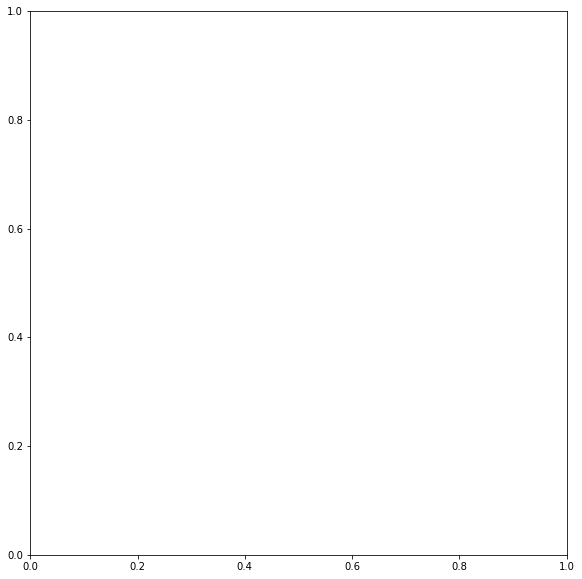

In [8]:
# group data by department name ('NOMBDEP') and aggregate specific columns to calculate the total 
#number of vacancies, applicants, entrants, and enrolled students for each department
grouped = institutes_with_departments.groupby('NOMBDEP').agg({
    'ltimoden_metaatencion': 'sum',  # total vacancies
    'cuentadeid_postulante_procesoadm': 'sum',  # Total applicants
    'sumaden_flagingresante': 'sum',  # Total entrants
    'sumaden_flagmatriculado': 'sum'  # Total enrolled students
}).reset_index()

# Merge the aggregated data with the departmental boundaries
dept_vacancies = dept_boundaries.merge(grouped, on='NOMBDEP')

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
dept_vacancies.plot(
    column='ltimoden_metaatencion',
    cmap='YlGnBu',
    legend=True,
    scheme='quantiles',
    ax=ax
)

# Manually configure the legend
leg = ax.get_legend()
leg.set_title('Total Vacancies by Department')
leg.set_bbox_to_anchor((1.5, 0.5))

plt.show()



In [ ]:
dept_vacancies

# 2. Make an interactive map of markes using visual_html function and show total vacancies, applicants, entrants, and enrolled information in a table popup

In [9]:
pip install folium

  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


In [10]:
import folium

In [11]:
#1.  Create a base map
mapa1 = folium.Map(location=[-9.19, -75.0152], zoom_start=6)  # Coordenadas centrales de Perú

#2.  Add markers to the map.
for idx, row in institutes_with_departments.iterrows(): 
    # Crear el contenido HTML para la ventana emergente
    html_content = folium.Html(f"""
        <table>
            <tr><th>Total Vacancies:</th><td>{row['ltimoden_metaatencion']}</td></tr>
            <tr><th>Total Applicants:</th><td>{row['cuentadeid_postulante_procesoadm']}</td></tr>
            <tr><th>Total Entrants:</th><td>{row['sumaden_flagingresante']}</td></tr>
            <tr><th>Total Enrolled:</th><td>{row['sumaden_flagmatriculado']}</td></tr>
        </table>
    """, script=True)

    # Create the popup window with HTML content
    popup = folium.Popup(html_content, max_width=2650)

    # Add the marker with the popup window to the map
    folium.Marker(    #Crear un marcador para cada institución, ubicándolo en las coordenadas especificadas
        [row['nlat_ie'], row['nlong_ie']],
        popup=popup,
        icon=folium.Icon(icon='university', prefix='fa')  # Utiliza el ícono de universidad de FontAwesome
    ).add_to(mapa1)

#3. Display the map
mapa1

### 3. Generate the ratio of applicants by vacancies and store it in a new column called ratio_applicants_vacancies ( total applicants / total vacancies ).  

In [12]:
import folium
from folium.plugins import MarkerCluster

In [13]:
institutes_with_departments['ratio_applicants_vacancies'] = (
    institutes_with_departments['cuentadeid_postulante_procesoadm'] /
    institutes_with_departments['ltimoden_metaatencion']
)

institutes_with_departments.columns.tolist() #We see that we have created the desired column "Ratio_applicants_vacancies"

['cod_mod',
 'ltimoden_metaatencion',
 'cuentadeid_postulante_procesoadm',
 'sumaden_flagingresante',
 'sumaden_flagmatriculado',
 'ratio',
 'ratio1',
 'dif',
 'dif1',
 'nlat_ie',
 'nlong_ie',
 'population_ccpp',
 'altitude',
 'Dblock1km',
 'Dblock2km',
 'Dblock3km',
 'Dblock5km',
 'Dblock10km',
 'Dblock20km',
 'Dblock30km',
 '_merge',
 'OBJECTID_1',
 'OBJECTID',
 'CCDD',
 'NOMBDEP',
 'CAPITAL',
 'Shape_STAr',
 'Shape_STLe',
 'ORIG_FID',
 'Shape_Leng',
 'Shape_Area',
 'CORREO',
 'CONTACTO',
 'WHATSAPP',
 'geometry',
 'ratio_applicants_vacancies']

### 3.1. Then, generate a cluster map with two groups of marker clusters. 
 
The first group should be compound by those institutes where there were more applicants than vacancies. Name this group as **Applicant Surplus**. The second group should be compound by those institutes where there were more vacancies than applicants. Name this group as **Applicant Deficit**

In [14]:
#Create a base map 
mapa = folium.Map(location=[-9.19, -75.0152], zoom_start=6)

# Crear clusters de marcadores
surplus_cluster = MarkerCluster(name='Applicant Surplus').add_to(mapa)
deficit_cluster = MarkerCluster(name='Applicant Deficit').add_to(mapa)

# Iterar sobre el DataFrame y añadir los marcadores a los clusters correspondientes
for idx, row in institutes_with_departments.iterrows():
    if row['ratio_applicants_vacancies'] > 1:
        # Más solicitantes que vacantes
        folium.Marker(
            location=[row['nlat_ie'], row['nlong_ie']],
            popup=f"Surplus: {row['ratio_applicants_vacancies']}",
            icon=folium.Icon(color='red')
        ).add_to(surplus_cluster)
    else:
        # Más vacantes que solicitantes
        folium.Marker(
            location=[row['nlat_ie'], row['nlong_ie']],
            popup=f"Deficit: {row['ratio_applicants_vacancies']}",
            icon=folium.Icon(color='green')
        ).add_to(deficit_cluster)

# Añadir capas de control para alternar la visualización de los clusters
folium.LayerControl().add_to(mapa)

# Mostrar el mapa
mapa

# 4. Generate a Circle map and plot only institutes with more applicants than vacancies. Make the radius= *ratio_applicants_vacancies* * 10000 . Make these circles of color green. Name the layer of circles as Applicant Surplus. Use FeatureGroup
Take this map as an example

In [15]:
# Filtering institutes with more applicants than vacancies and storing the result in 'applicant_surplus_data'
applicant_surplus_data= institutes_with_departments[institutes_with_departments['ratio_applicants_vacancies']>1]

# Displaying the first three rows of the filtered data
applicant_surplus_data.head(3)

,cod_mod,ltimoden_metaatencion,cuentadeid_postulante_procesoadm,sumaden_flagingresante,sumaden_flagmatriculado,ratio,ratio1,dif,dif1,nlat_ie,...,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry,ratio_applicants_vacancies
0,207597,307,481,302,301,0.980456,1.566775,-6,174,-13.52107,...,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-71.97748 -13.52107),1.566775
1,586669,516,1047,515,544,1.054264,2.029070,28,531,-14.14240,...,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-71.40813 -14.14240),2.029070
2,591909,180,297,169,169,0.938889,1.650000,-11,117,-13.30178,...,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-72.12163 -13.30178),1.650000


In [20]:
# Creating a Circle Map for Applicant Surplus centered on Peru
mapa = folium.Map(location=[-9.189967, -75.015152], zoom_start=6)

# Creating a FeatureGroup for Applicant Surplus with control enabled
ap_s = folium.FeatureGroup(name='Applicant Surplus', control=True)

# Iterating over the DataFrame to add circles representing institutes with more applicants than vacancies
for _, row in applicant_surplus_data.iterrows():
    
    folium.Circle(location=[row['geometry'].y, row['geometry'].x],
                  radius=row['ratio_applicants_vacancies'] * 10000,
                  fill=True,
                  fill_color="#4da170",
                  color="#4da170").add_to(ap_s)
    
# Adding the Applicant Surplus FeatureGroup to the map
ap_s.add_to(mapa)  

# Adding layer control to the map
folium.LayerControl().add_to(mapa)  

# Displaying the map
mapa


# 5. Generate a Circle map and plot only institutes with less applicants than vacancies. Make the radius= ratio_applicants_vacancies * 10000 . Make these circles of color red. Name the layer of circles as Applicant Deficit. Use FeatureGroup.

In [17]:
# Filtering institutes with less applicants than vacancies and storing the result in 'applicant_deficit_data'
applicant_deficit_data= institutes_with_departments[institutes_with_departments['ratio_applicants_vacancies']<1]

# Displaying the first three rows of the filtered data
applicant_deficit_data.head(3)

,cod_mod,ltimoden_metaatencion,cuentadeid_postulante_procesoadm,sumaden_flagingresante,sumaden_flagmatriculado,ratio,ratio1,dif,dif1,nlat_ie,...,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry,ratio_applicants_vacancies
7,931550,644,364,324,315,0.489130,0.565217,-329,-280,-14.79923,...,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-71.41132 -14.79923),0.565217
9,933168,555,349,316,260,0.468468,0.628829,-295,-206,-13.51953,...,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-71.98321 -13.51953),0.628829
11,933242,740,476,464,464,0.627027,0.643243,-276,-264,-12.86650,...,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,POINT (-72.68892 -12.86650),0.643243


In [21]:
# Creating a Circle Map for Applicant Deficit centered on Peru
mapa = folium.Map(location=[-9.189967, -75.015152], zoom_start=6)

# Creating a FeatureGroup for Applicant Deficit with control enabled
ap_d = folium.FeatureGroup(name='Applicant Deficit', control=True)

# Iterating over the DataFrame to add circles representing institutes with less applicants than vacancies
for _, row in applicant_deficit_data.iterrows():
    
    folium.Circle(location=[row['geometry'].y, row['geometry'].x],
                  radius=row['ratio_applicants_vacancies'] * 10000,
                  fill=True,
                  fill_color="red",
                  color="red").add_to(ap_d)
    
# Adding the Applicant Deficit FeatureGroup to the map
ap_d.add_to(mapa)  

# Adding layer control to the map
folium.LayerControl().add_to(mapa)  

# Displaying the map
mapa


# 6